In [7]:
import os

# List uploaded files in current Colab session
os.listdir()


['.config', 'NikeProductDescriptions.csv', 'sample_data']

In [8]:
import pandas as pd

# Load the file directly
df = pd.read_csv('NikeProductDescriptions.csv')

# Show the column names
print(df.columns)

# Optional: Show first few rows
df.head()


Index(['Title', 'Subtitle', 'Product Description'], dtype='object')


,Title,Subtitle,Product Description
0,Nike Air Force 1 '07,Men's Shoes,It doesn't get more legendary than this. Desig...
1,Nike Air Max Dawn SE,Men's Shoes,Find out what moves you with the Air Max Dawn....
2,Nike SB Dunk Low Pro Premium,Skate Shoes,Pack your style—on your feet. Bringing a fresh...
3,Nike Air Force 1 Mid '07 LX,Men's Shoes,The celebrations just keep coming. Unbox the A...
4,Nike Air Force 1 Mid '07,Men's Shoes,"Got your fave colour yet? No worries, the Colo..."


In [17]:

target_subtitles = ["Men's Shoes", "Men's T-Shirt", "Women's Shoes",
                    "Skate Shoes", "Older Kids' T-Shirt"]

filtered_df = df[df['Subtitle'].isin(target_subtitles) | df['Subtitle'].str.contains('Shorts', case=False, na=False)]

filtered_df.loc[filtered_df['Subtitle'].str.contains('Shorts', case=False, na=False), 'Subtitle'] = 'Shorts'

filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()


/tmp/ipython-input-17-969258686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['Subtitle'].str.contains('Shorts', case=False, na=False), 'Subtitle'] = 'Shorts'


,Title,Subtitle,Product Description
0,Nike Air Force 1 '07,Men's Shoes,It doesn't get more legendary than this. Desig...
1,Nike Air Max Dawn SE,Men's Shoes,Find out what moves you with the Air Max Dawn....
2,Nike SB Dunk Low Pro Premium,Skate Shoes,Pack your style—on your feet. Bringing a fresh...
3,Nike Air Force 1 Mid '07 LX,Men's Shoes,The celebrations just keep coming. Unbox the A...
4,Nike Air Force 1 Mid '07,Men's Shoes,"Got your fave colour yet? No worries, the Colo..."


In [10]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

descriptions = filtered_df['Product Description'].fillna('').tolist()

embeddings = model.encode(descriptions, show_progress_bar=True)


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plot_df = pd.DataFrame({
    'PC1': reduced_embeddings[:, 0],
    'PC2': reduced_embeddings[:, 1],
    'Subtitle': filtered_df['Subtitle']
})


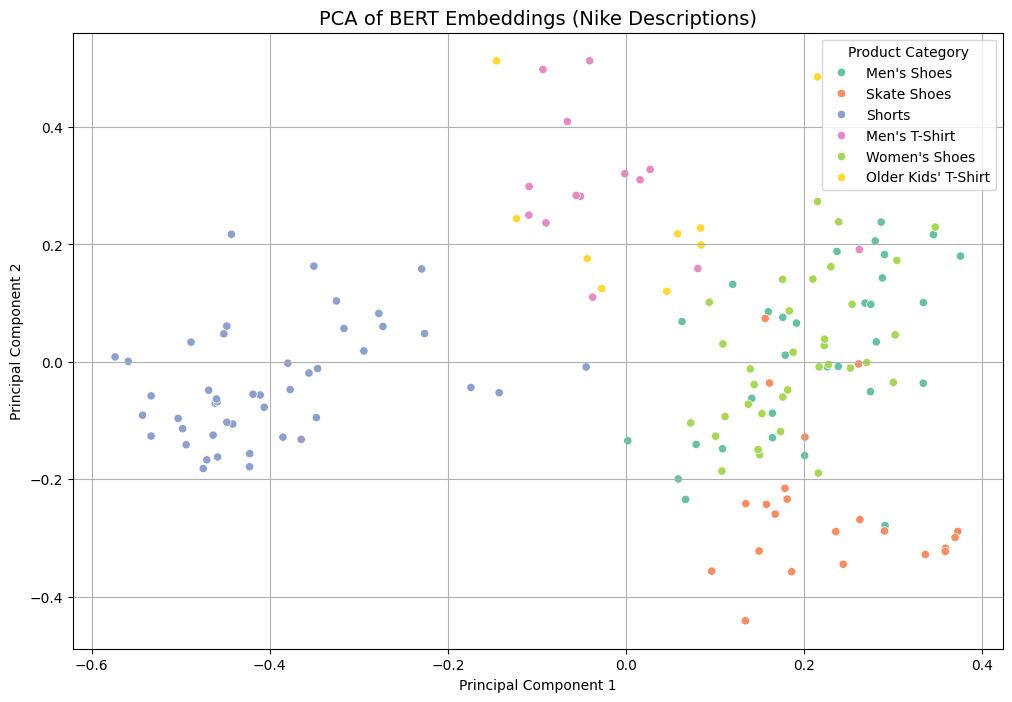

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Subtitle', palette='Set2')
plt.title('PCA of BERT Embeddings (Nike Descriptions)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()
